In [1]:
!pip install selenium  

In [1]:
import selenium
import pandas as pd
from selenium import webdriver
from selenium.common.exceptions import StaleElementReferenceException, NoSuchElementException

# Q1) & Q2)

In [18]:
driver=webdriver.Chrome("chromedriver.exe")

In [19]:
driver.get("https://www.amazon.in")

In [20]:
val = input("Enter your value: ") 
print(val) 

Enter your value: phone
phone


In [21]:
search=driver.find_element_by_xpath("//input[@id='twotabsearchtextbox']")
search.send_keys(val)

In [22]:
button=driver.find_element_by_xpath("//input[@id='nav-search-submit-button']")
button.click()

In [23]:
title=[]
ratings=[]
prices=[]
no_of_rating=[]
availability=[]
link=[]

In [24]:
name=driver.find_elements_by_xpath("//h2[@class='a-size-mini a-spacing-none a-color-base s-line-clamp-2']//span")
for i in name:
    if i.text is None :
        title.append("--") 
    else:
        title.append(i.text)
title[0:4]

['Samsung Galaxy M02 (Red,3GB RAM, 32GB Storage)',
 'Lava Z1 (2GBRAM, 16GB Storage) Denim Blue',
 'Redmi 9A (Nature Green, 2GB Ram, 32GB Storage) | 2GHz Octa-core Helio G25 Processor',
 'Redmi 9A (Nature Green, 3GB Ram, 32GB Storage) | 2GHz Octa-core Helio G25 Processor']

In [25]:
rate=driver.find_elements_by_xpath("//div[@class='a-row a-size-small']//span[2]")
for i in rate:
     if i.text is None :
        no_of_rating.append("--") 
     else:
        no_of_rating.append(i.text)
no_of_rating[0:4]

['863', '21', '13,912', '13,912']

In [26]:
Review=driver.find_elements_by_xpath("//div[@class='a-row']//a//span[1]/span[2]")
Review[0:4]
for i in Review:
    Reviews=i.text
    prices.append(Reviews)
prices[0:4]

['₹7,499', '₹4,999', '₹6,799', '₹7,499']

In [27]:
a=driver.find_elements_by_xpath("//div[@class='a-row s-align-children-center']//span[2]/span[2]")
for i in a:
    if i.text is None :
        availability.append("--") 
    else:
        availability.append(i.text)
availability[0:4]

['Tomorrow, March 1', 'Tuesday, March 2', 'Today 9PM', 'Tomorrow, March 1']

In [28]:
u=driver.find_elements_by_xpath("//a[@class='a-link-normal s-no-outline']")
for i in u:
    link.append(i.get_attribute('href'))

In [29]:
#locating Ratings
urls=driver.find_elements_by_xpath("//a[@class='a-link-normal a-text-normal']")#collecting urls of all the laptop
UR=[]
for i in urls[:10]:
    UR.append(i.get_attribute('href'))#getting the url of first 10 laptops
for url in UR:#loop for every laptop in the list
    driver.get(url)
    try:                  #exception handling for nosuchelementexception
        rate=driver.find_element_by_xpath("//span[@id='acrCustomerReviewText']")#locating the ratingd link
        rate.click()                                                      #click the rating link found
        rating=driver.find_element_by_xpath("//span[@class='a-size-medium a-color-base']")#locating the rating
        ratings.append(rating.text)#appending the ratings in Ratings list
        
    except NoSuchElementException   as e:
        ratings.append("NO rating")#appending the No rating if no rating is there

In [30]:
ratings

['3.7 out of 5',
 '3.5 out of 5',
 '4.1 out of 5',
 '4.1 out of 5',
 '4 out of 5',
 '4 out of 5',
 '4 out of 5',
 '2.8 out of 5',
 '4.1 out of 5',
 '4 out of 5']

In [31]:
import pandas as pd
df=pd.DataFrame({})
df['Name']=title[0:10]
df['Price']=prices[0:10]
df['Rating']=ratings[0:10]
df['No_of_Rating']=no_of_rating[0:10]
df['Availability']=availability[0:10]
df['Url']=link[0:10]

In [32]:
df.to_csv('Product.csv', index = False)

In [33]:
df

,Name,Price,Rating,No_of_Rating,Availability,Url
0,"Samsung Galaxy M02 (Red,3GB RAM, 32GB Storage)","₹7,499",3.7 out of 5,863,"Tomorrow, March 1",https://www.amazon.in/gp/slredirect/picassoRed...
1,"Lava Z1 (2GBRAM, 16GB Storage) Denim Blue","₹4,999",3.5 out of 5,21,"Tuesday, March 2",https://www.amazon.in/gp/slredirect/picassoRed...
2,"Redmi 9A (Nature Green, 2GB Ram, 32GB Storage)...","₹6,799",4.1 out of 5,"13,912",Today 9PM,https://www.amazon.in/Redmi-9A-2GB-32GB-Storag...
3,"Redmi 9A (Nature Green, 3GB Ram, 32GB Storage)...","₹7,499",4.1 out of 5,"13,912","Tomorrow, March 1",https://www.amazon.in/Redmi-9A-3GB-32GB-Storag...
4,"Redmi 9 (Sky Blue, 4GB RAM, 64GB Storage)","₹8,799",4 out of 5,"11,390","Tuesday, March 2",https://www.amazon.in/Redmi-Sky-Blue-64GB-Stor...
5,"Redmi 9 (Carbon Black, 4GB RAM, 64GB Storage)","₹8,799",4 out of 5,"11,390","Tuesday, March 2",https://www.amazon.in/Redmi-Carbon-Black-64GB-...
6,"Oppo A31 (Fantasy White, 6GB RAM, 128GB Storag...","₹11,990",4 out of 5,"3,009",Today 9PM,https://www.amazon.in/Oppo-Fantasy-Storage-Add...
7,"Panasonic Eluga i7 (2GB RAM, 16GB Storage, Fin...","₹5,004",2.8 out of 5,"1,337","Tuesday, March 2",https://www.amazon.in/Panasonic-Storage-Finger...
8,"Redmi 9A (Sea Blue, 2GB Ram, 32GB Storage) | 2...","₹6,799",4.1 out of 5,"13,912","Saturday, March 6",https://www.amazon.in/Redmi-9A-2GB-32GB-Storag...
9,Nokia 105 Single SIM (Black),"₹1,131",4 out of 5,"14,529",Today 9PM,https://www.amazon.in/Nokia-105-2019-Single-Bl...


# Q3)

In [29]:
driver=webdriver.Chrome("chromedriver.exe")

In [30]:
driver.get("https://images.google.com/")

In [31]:
val = input("Enter your value: ") 
print(val) 

Enter your value: fruits
fruits


In [32]:
fruits=[]

In [33]:
search=driver.find_element_by_xpath("//input[@class='gLFyf gsfi']")
search.send_keys(val)

In [34]:
button=driver.find_element_by_xpath("//button[@class='Tg7LZd']")
button.click()

In [37]:
images = driver.find_elements_by_tag_name('img')
for i in images:
    fruits.append(i.get_attribute('src'))

In [38]:
button=driver.find_element_by_xpath("//input[@class='mye4qd']")
button.click()

In [39]:
images = driver.find_elements_by_tag_name('img')
for i in images:
    fruits.append(i.get_attribute('src'))

['',
 '',
 '',
 '']
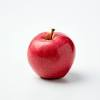
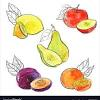
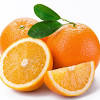
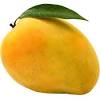

In [40]:
fruits[0:4]

# Q7)

In [104]:
driver=webdriver.Chrome("chromedriver.exe")
driver.get("https://www.digit.in/top-products/top-10-pc-games-7.html")
names=[]
detail=[]

In [113]:
name=driver.find_elements_by_xpath("//div[@class='TopNumbeHeading active sticky-footer']/h3")
for i in name:
    if i.text is None :
        names.append("--") 
    else:
        names.append(i.text)
names[0:4]

['THE WITCHER 3',
 'GRAND THEFT AUTO V',
 'RED DEAD REDEMPTION 2',
 'THE ELDER SCROLLS V: SKYRIM']

In [106]:
name=driver.find_elements_by_xpath("//div[@class='Section-center']//p")
for i in name:
    if i.text is None :
        detail.append("--") 
    else:
        detail.append(i.text)

In [114]:
import pandas as pd
df=pd.DataFrame({})
df['Name']=names[0:10]
df['Detail']=detail[0:10]
df

,Name,Detail
0,THE WITCHER 3,The Witcher 3 is considered to be one of the f...
1,GRAND THEFT AUTO V,The Grand Theft Auto series is a legend in gam...
2,RED DEAD REDEMPTION 2,"Like it’s GTA brethren, Red Dead Redemption 2 ..."
3,THE ELDER SCROLLS V: SKYRIM,Bethesda is known for its massive RPG’s and El...
4,DOOM: ETERNAL,Doom: Eternal takes the insane FPS action of D...
5,FORZA HORIZON 4,Forza Horizon 4 is a gorgeous racing game that...
6,ASSASSIN’S CREED: ODYSSEY,Assassin’s Creed: Odyssey continues the title’...
7,MINECRAFT,Minecraft took the world by storm. It offered ...
8,CALL OF DUTY: WARZONE,Call of Duty: Warzone is a free game from Acti...
9,ORI AND THE WILL OF THE WISPS,Ori and the Will of the Wisps is a sequel to t...


# Q6)

In [115]:
driver=webdriver.Chrome("chromedriver.exe")

In [116]:
driver.get("https://trak.in/india-startup-funding-investment-2015/")

In [117]:
Date=[]
startup_name=[]
industry=[]
industry_types=[]
city=[]
investor=[]
investor_type=[]
amount=[]

In [119]:
name=driver.find_elements_by_xpath("//td[@class='column-2']")
for i in name:
    if i.text is None :
        Date.append("--") 
    else:
        Date.append(i.text)
Date[0:4]

['15/01/2021', '28/01/2021', '19/01/2021', '19/01/2021']

In [120]:
name=driver.find_elements_by_xpath("//td[@class='column-3']")
for i in name:
    if i.text is None :
        startup_name.append("--") 
    else:
        startup_name.append(i.text)
startup_name[0:4]

['Digit Insurance', 'Bombay Shaving Company', 'DeHaat', 'Darwinbox']

In [121]:
name=driver.find_elements_by_xpath("//td[@class='column-4']")
for i in name:
    if i.text is None :
        industry.append("--") 
    else:
        industry.append(i.text)
industry[0:4]

['Financial Services', 'Consumer Goods Company', 'AgriTech Startup', 'SaaS']

In [122]:
name=driver.find_elements_by_xpath("//td[@class='column-5']")
for i in name:
    if i.text is None :
        industry_types.append("--") 
    else:
        industry_types.append(i.text)
industry_types[0:4]

['Insurance Services',
 'Shave care, beard care, and skincare products',
 'online marketplace for farm products and services',
 'HR Tech']

In [123]:
name=driver.find_elements_by_xpath("//td[@class='column-6']")
for i in name:
    if i.text is None :
        city.append("--") 
    else:
        city.append(i.text)
city[0:4]

['Bengaluru', 'New Delhi', 'Patna', 'Mumbai']

In [124]:
name=driver.find_elements_by_xpath("//td[@class='column-7']")
for i in name:
    if i.text is None :
        investor.append("--") 
    else:
        investor.append(i.text)
investor[0:4]

['A91 Partners, Faering Capital, TVS Capital Funds',
 'Reckitt Benckiser',
 'Prosus Ventures',
 'Salesforce Ventures']

In [125]:
name=driver.find_elements_by_xpath("//td[@class='column-8']")
for i in name:
    if i.text is None :
        investor_type.append("--") 
    else:
        investor_type.append(i.text)
investor_type[0:4]

['Venture', 'Venture', 'Series C', 'Seed']

In [126]:
name=driver.find_elements_by_xpath("//td[@class='column-9']")
for i in name:
    if i.text is None :
        amount.append("--") 
    else:
        amount.append(i.text)
amount[0:4]

['1,80,00,000', '6,172,258.50', '30,000,000', '15,000,000']

In [127]:
import pandas as pd
df=pd.DataFrame({})
df['date']=Date[0:10]
df['Startup_names']=startup_name[0:10]
df['Industry']=industry[0:10]
df['Industry_type']=industry_types[0:10]
df['Citys']=city[0:10]
df['Investors']=investor[0:10]
df['Investor_types']=investor_type[0:10]
df['Amount']=amount[0:10]
df

,date,Startup_names,Industry,Industry_type,Citys,Investors,Investor_types,Amount
0,15/01/2021,Digit Insurance,Financial Services,Insurance Services,Bengaluru,"A91 Partners, Faering Capital, TVS Capital Funds",Venture,"1,80,00,000"
1,28/01/2021,Bombay Shaving Company,Consumer Goods Company,"Shave care, beard care, and skincare products",New Delhi,Reckitt Benckiser,Venture,"6,172,258.50"
2,19/01/2021,DeHaat,AgriTech Startup,online marketplace for farm products and services,Patna,Prosus Ventures,Series C,"30,000,000"
3,19/01/2021,Darwinbox,SaaS,HR Tech,Mumbai,Salesforce Ventures,Seed,"15,000,000"
4,18/01/2021,mfine,Health Tech Startup,AI-powered telemedicine mobile app,Bengaluru,Heritas Capital Management,Venture Round,"16,000,000"
5,18/01/2021,Udayy,EdTech,Online learning platform for kids in class 1-5,Gurgaon,Sequoia Capital,Seed Funding,"15,000,000"
6,11/01/2021,True Elements,Food Startup,Whole Food plant based Nashta,Pune,SIDBI Venture Capital,Series,"100,000,000"
7,13/01/2021,Saveo,B2B E-commerce,Pharmacies,Bengaluru,"Matrix Partners India, RTP Global, others",Seed,"4,000,000"
8,15/12/2020,Bira 91,Food and Beverage,Craft Beer,New Delhi,"Nishant Mittal, Pankaj Chaddah and Shikha Suni...",Funding,"1,273,634.07"
9,21/12/2020,Pine Labs,Financial Services,Payment Solutions Provider,Noida,Lone Pine Capital,Secondary Market,Undisclosed


# Q5)

In [167]:
driver=webdriver.Chrome("chromedriver.exe")

In [168]:
driver.get("https://images.google.com/maps")

In [169]:
val = input("Enter your value: ") 
print(val) 

Enter your value: delhi
delhi


In [170]:
search=driver.find_element_by_xpath("//input[@class='tactile-searchbox-input']")
search.send_keys(val)

In [171]:
button=driver.find_element_by_xpath("//button[@id='searchbox-searchbutton']")
button.click()

In [172]:
location=[]

In [173]:
name=driver.find_elements_by_xpath("//button[@class='widget-reveal-card-address']")
for i in name:
    if i.text is None :
        location.append("--") 
    else:
        location.append(i.text)
location[0:4]

[]

# Q4)

In [215]:
driver=webdriver.Chrome("chromedriver.exe")
driver.get("https://www.flipkart.com")

In [216]:
search=driver.find_element_by_xpath("//input[@class='_3704LK']")
search.send_keys("oneplus nord5g")

In [219]:
button = driver.find_element_by_xpath("//button[@class='L0Z3Pu']")
button.click()

In [220]:
names=[]
Ram=[]
display=[]
camera=[]
battery=[]

In [221]:
name=driver.find_elements_by_xpath("//div[@class='_4rR01T']")
for i in name:
    if i.text is None :
        names.append("--") 
    else:
        names.append(i.text)
names[0:4]

['OnePlus One (Silk White, 16 GB)']

In [222]:
r=driver.find_element_by_xpath("//div[@class='fMghEO']//li[1]")
Ram.append(r.text)   
Ram[0:4]

['3 GB RAM | 16 GB ROM']

In [223]:
r=driver.find_element_by_xpath("//div[@class='fMghEO']//li[2]")
display.append(r.text)   
display[0:4]

['13.97 cm (5.5 inch) Full HD Display']

In [224]:
r=driver.find_element_by_xpath("//div[@class='fMghEO']//li[3]")
camera.append(r.text)   
camera[0:4]

['13MP Rear Camera | 5MP Front Camera']

In [225]:
r=driver.find_element_by_xpath("//div[@class='fMghEO']//li[4]")
battery.append(r.text)   
battery[0:4]

['3100 mAh Li-Polymer Battery']

In [226]:
processor=[]
r=driver.find_element_by_xpath("//div[@class='fMghEO']//li[5]")
processor.append(r.text)   
processor

['Qualcomm Snapdragon 801 Processor']

In [227]:
warrant=[]
r=driver.find_element_by_xpath("//div[@class='fMghEO']//li[6]")
warrant.append(r.text)   
warrant

['Brand Warranty of 1 Year Available for Mobile and 6 Months for Accessories']

In [228]:
amount=[]
r=driver.find_element_by_xpath("//div[@class='_30jeq3 _1_WHN1']")
amount.append(r.text)   
amount

['₹18,998']

In [229]:
import pandas as pd
df=pd.DataFrame({})
df['Name']=names
df['RAM']=Ram
df['Display']=display
df['Camera']=camera
df['Battery']=battery
df['Processor']=processor
df['Warrant']=warrant
df['Amount']=amount
df

,Name,RAM,Display,Camera,Battery,Processor,Warrant,Amount
0,"OnePlus One (Silk White, 16 GB)",3 GB RAM | 16 GB ROM,13.97 cm (5.5 inch) Full HD Display,13MP Rear Camera | 5MP Front Camera,3100 mAh Li-Polymer Battery,Qualcomm Snapdragon 801 Processor,Brand Warranty of 1 Year Available for Mobile ...,"₹18,998"


In [230]:
df.to_csv('Brand.csv', index = False)